In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import sys
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import Matern

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler

In [8]:
sys.path.append(str(Path().resolve().parent.parent))
from path_manager import VEL_MODELS, MISC_DIR, VEL_DATA_DIR, PLOT_DIR, TRAIN_DATA_NB

In [9]:
velocity_soc_df = pd.read_csv(MISC_DIR / 'velocity_relative_SOC.csv')
test_df = pd.read_csv(MISC_DIR / 'velocity_relative_SOC_test_new.csv')
pd.options.mode.chained_assignment = None  # default='warn'

VEL_TRAIN_A1 = VEL_DATA_DIR / 'train' / 'assertive_batch1'
VEL_TRAIN_A2 = VEL_DATA_DIR / 'train' / 'assertive_batch2'
VEL_TRAIN_D1 = VEL_DATA_DIR / 'train' / 'defensive_batch1'
VEL_TRAIN_D2 = VEL_DATA_DIR / 'train' / 'defensive_batch2'

VEL_REF = VEL_DATA_DIR / 'reference'
VEL_TEST = VEL_DATA_DIR / 'test'

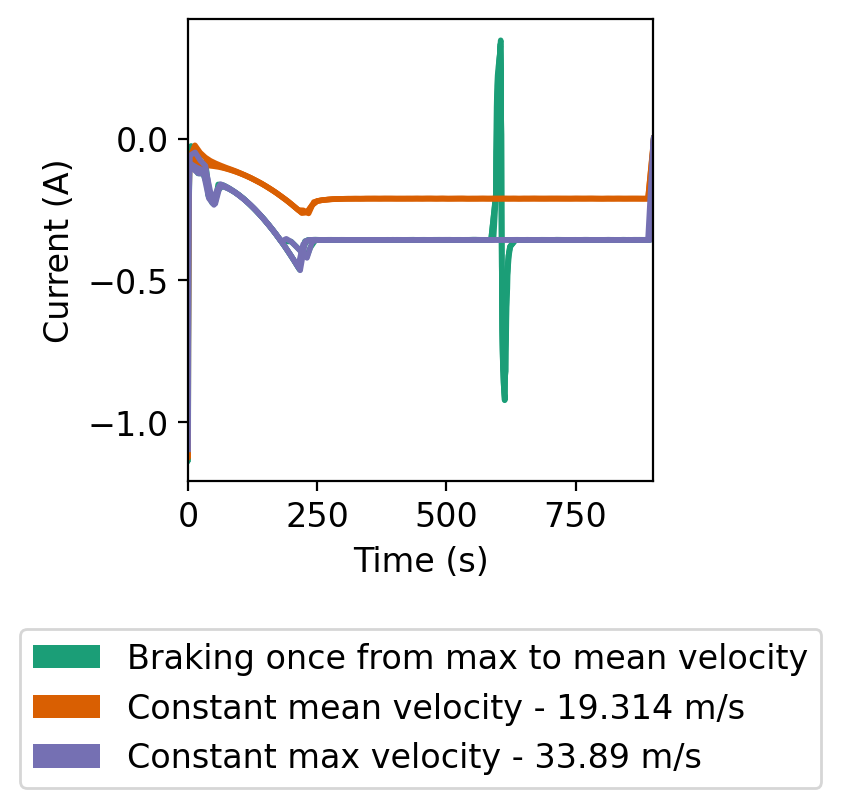

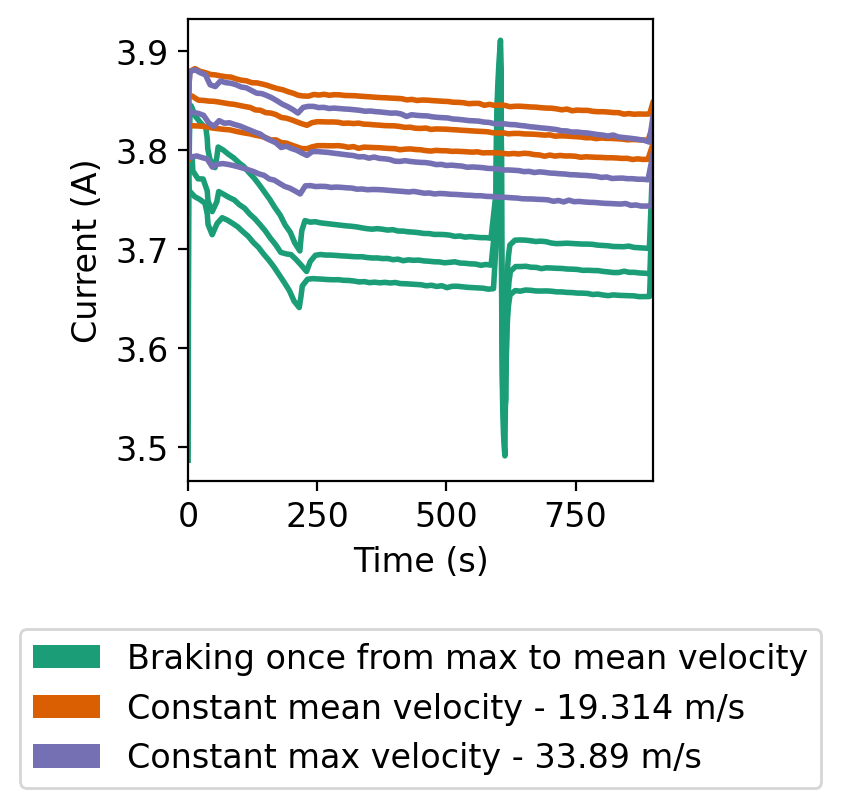

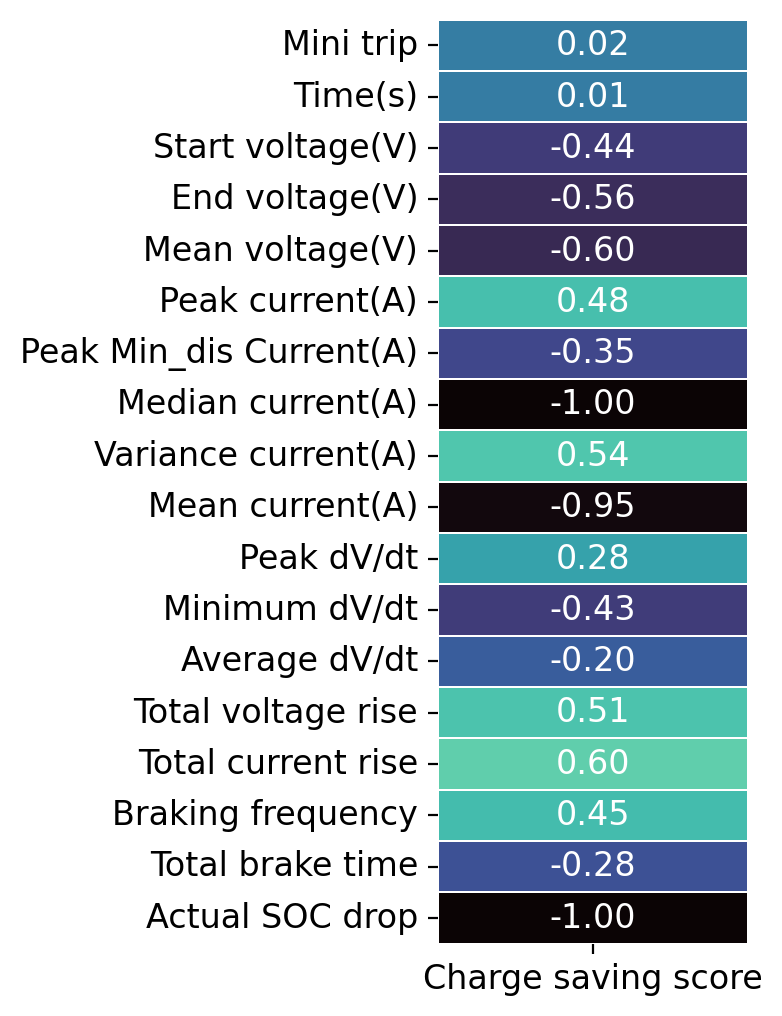

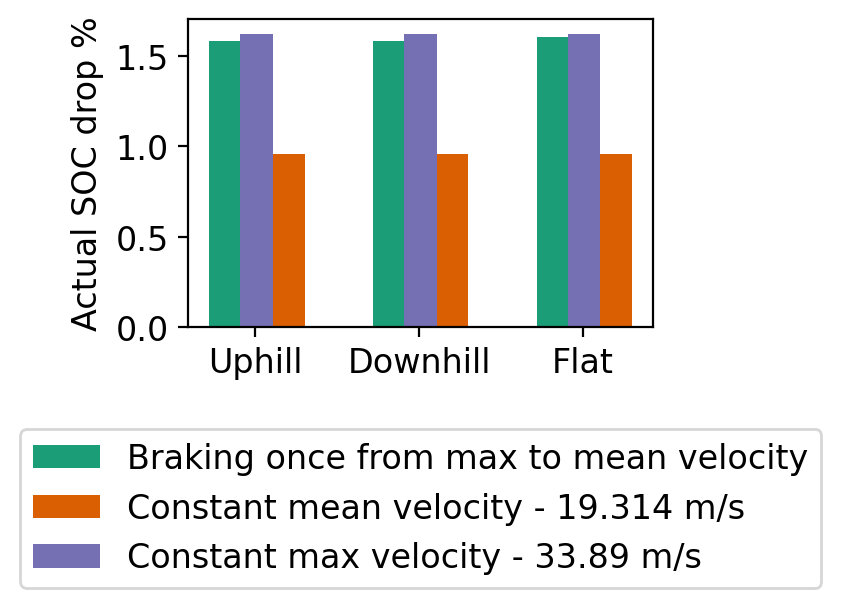

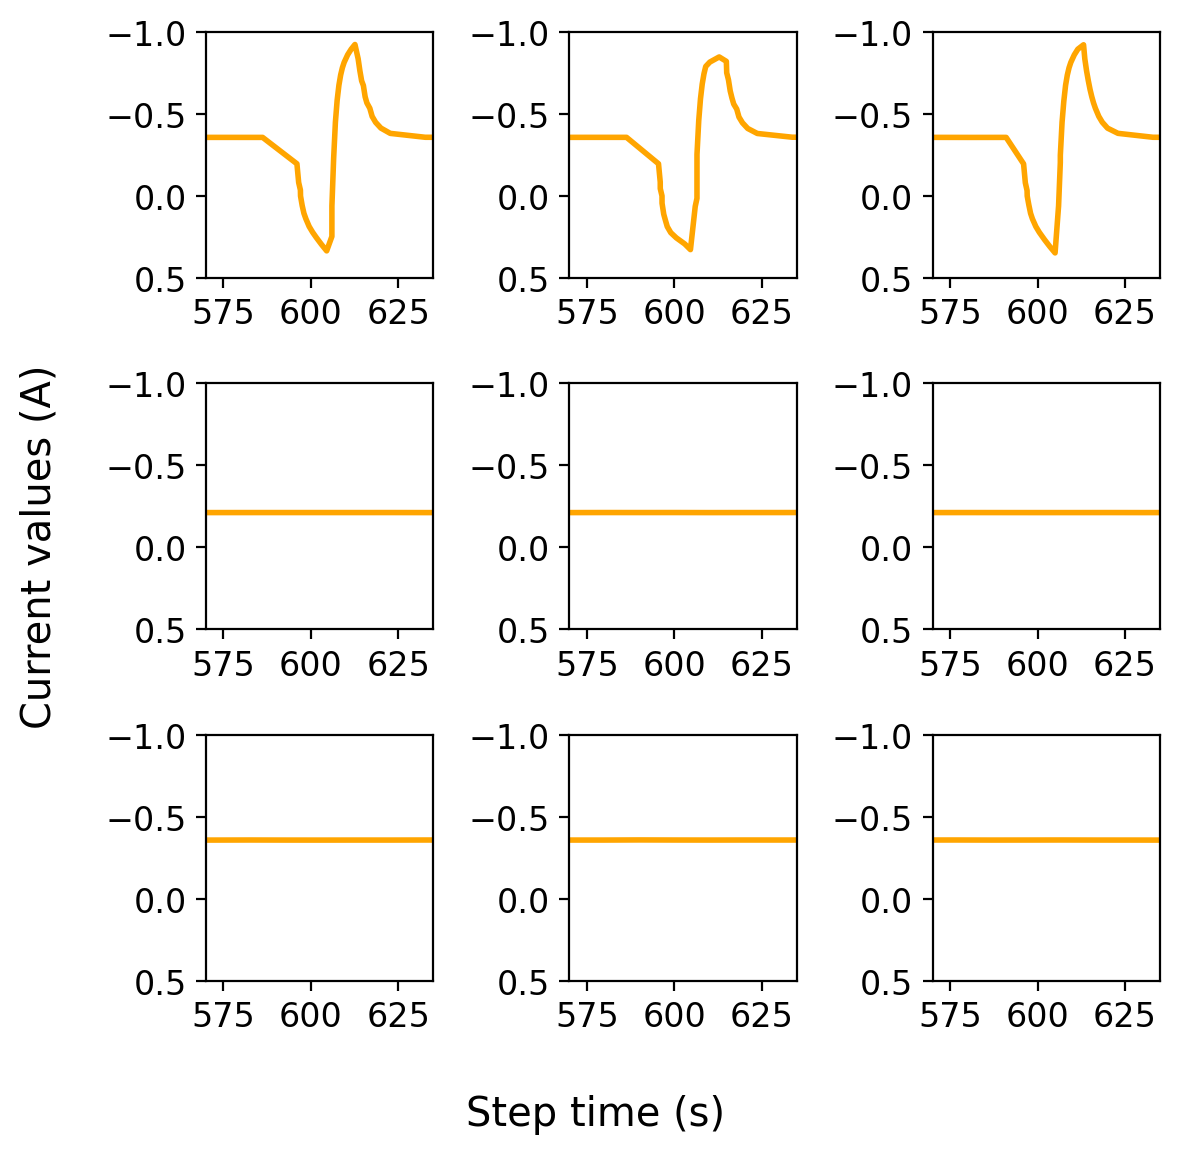

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_88383/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_88383/32172

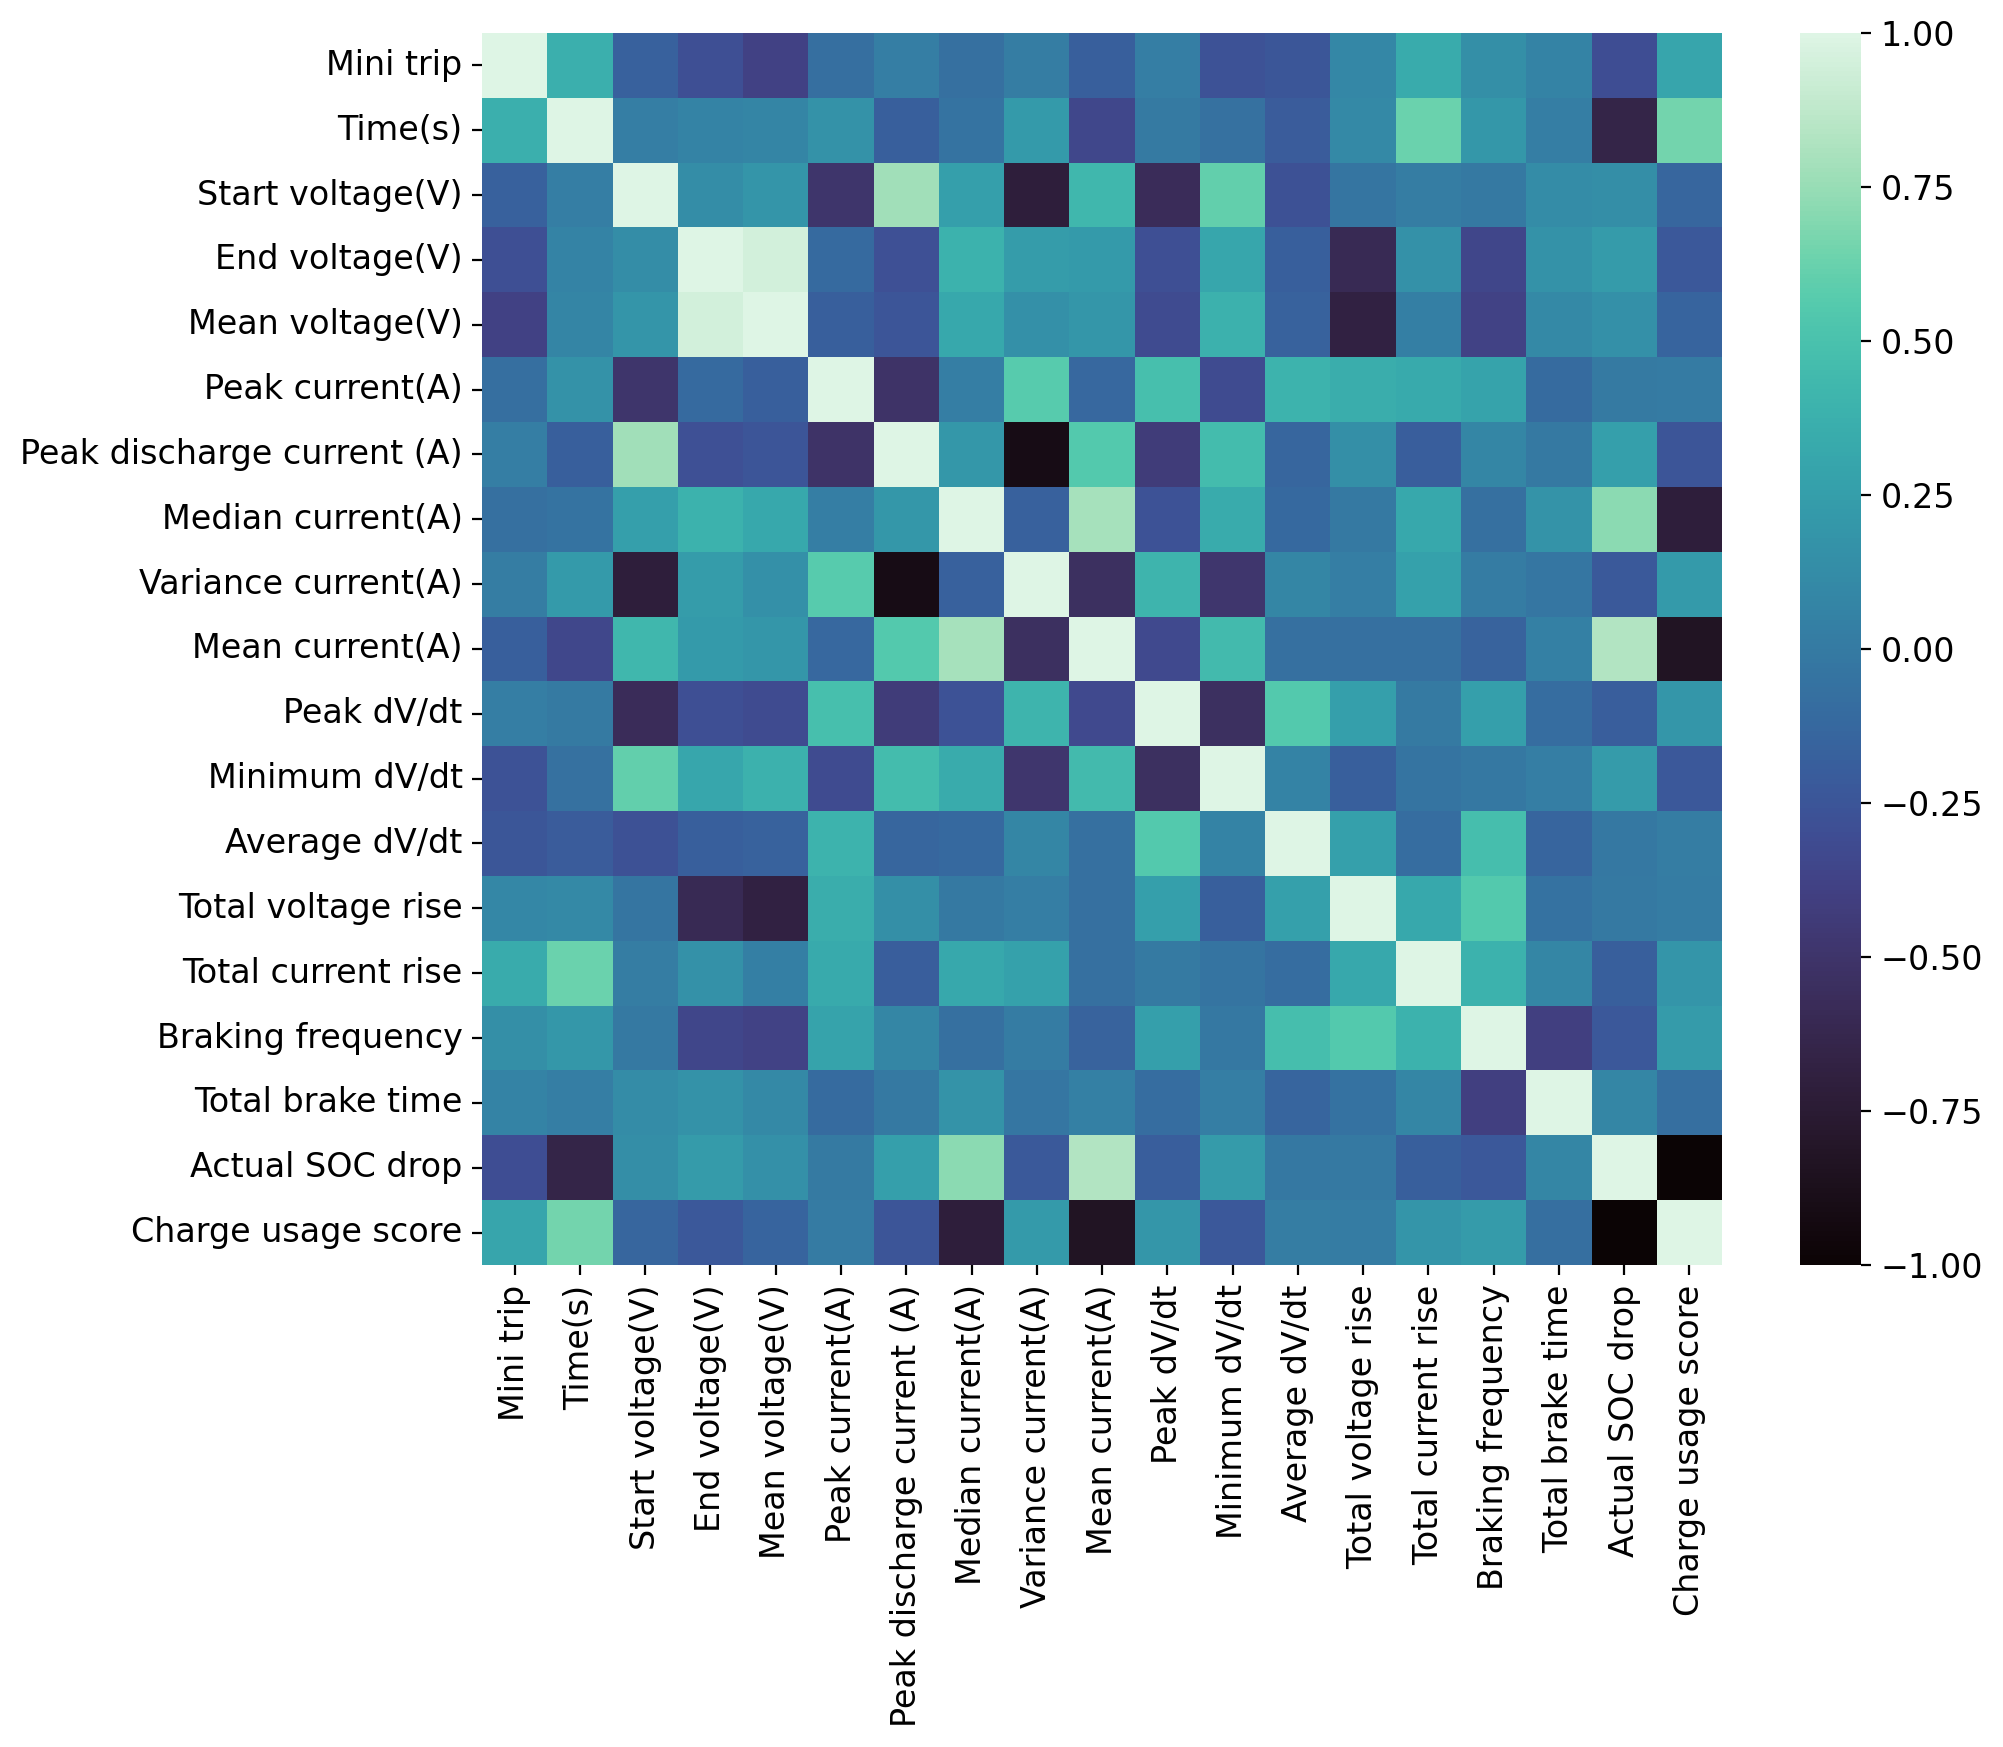

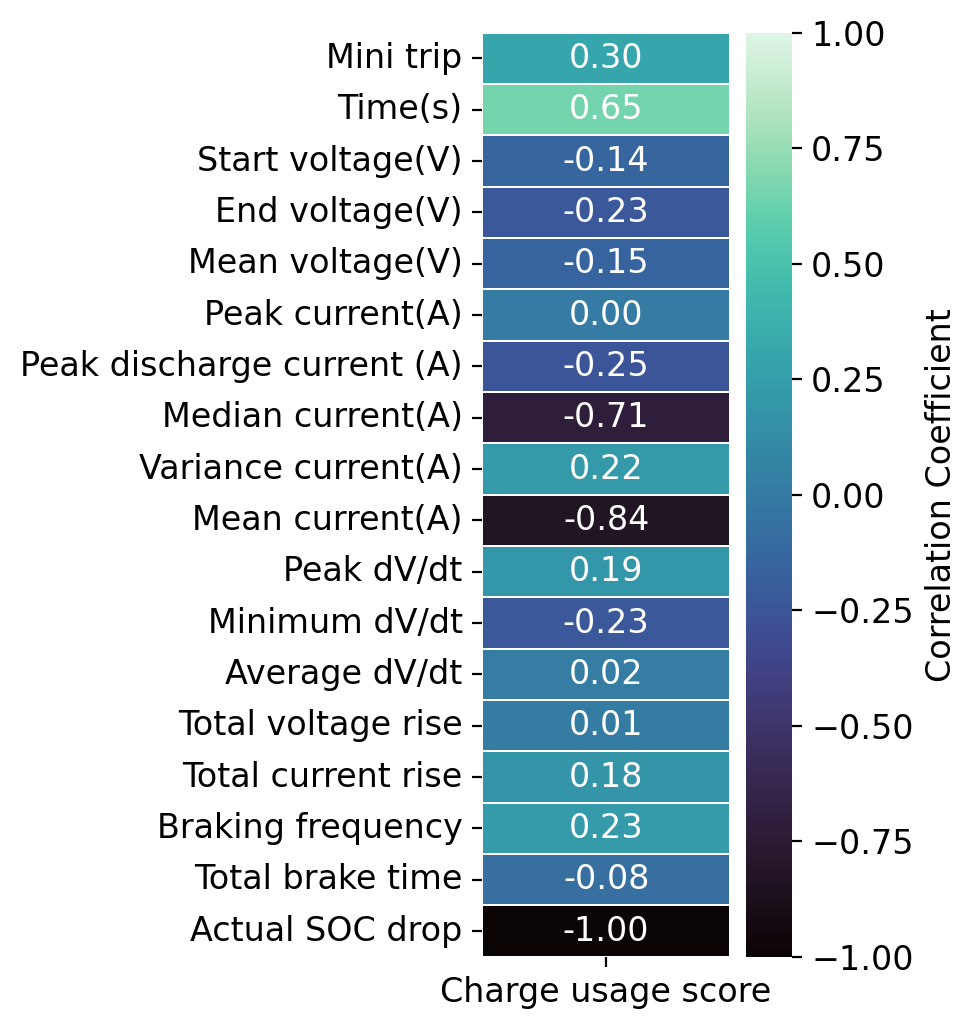

In [10]:
%run {TRAIN_DATA_NB}

In [11]:
vel_def_11= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_75188.xlsx')
vel_def_12= pd.read_excel(VEL_TRAIN_D1 /'speed_DR_75053.xlsx')
vel_def_13= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_74866.xlsx')
vel_def_14= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_74789.xlsx')
vel_def_21= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4716.xlsx')

# switch with
vel_def_22 = pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_74705.xlsx')
#vel_def_22= pd.read_excel(r'drivecycles/def2/speed_DR_4832.xlsx')

vel_def_23= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4839.xlsx')
vel_def_24= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4840.xlsx')

# outer
#vel_asser_11 = pd.read_excel(r'drivecycles/asser1/speed_DR_74428.xlsx')
vel_asser_11= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_14634.xlsx')

# new drive cycle
# vel_asser_11= pd.read_excel(r'drivecycles/asser1/speed_DR_14634.xlsx')

vel_asser_12= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74517.xlsx')
vel_asser_13= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74594.xlsx')
vel_asser_14= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74670.xlsx')
vel_asser_21= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74765.xlsx')

# switch 
vel_asser_22 = pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_4832.xlsx')
#vel_asser_22= pd.read_excel(r'drivecycles/asser2/speed_DR_74705.xlsx')

vel_asser_23= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74674.xlsx')
vel_asser_24= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74389.xlsx')

In [12]:
vel_list=[]
vel_list.extend([vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24
                ])

In [13]:
vel_dict={}
for v_d in range (1,97):
    vel_dict[v_d]= vel_list[v_d-1]

In [14]:
#vel_dict

In [15]:
vel_info= pd.DataFrame({'Mini_trip': range(1, 97)})

# Add the 'SOC_drop (%)' column to vel_info DataFrame
vel_info['SOC_drop (%)'] = info_data_2['SOC_drop (%)']

In [16]:
#vel_list

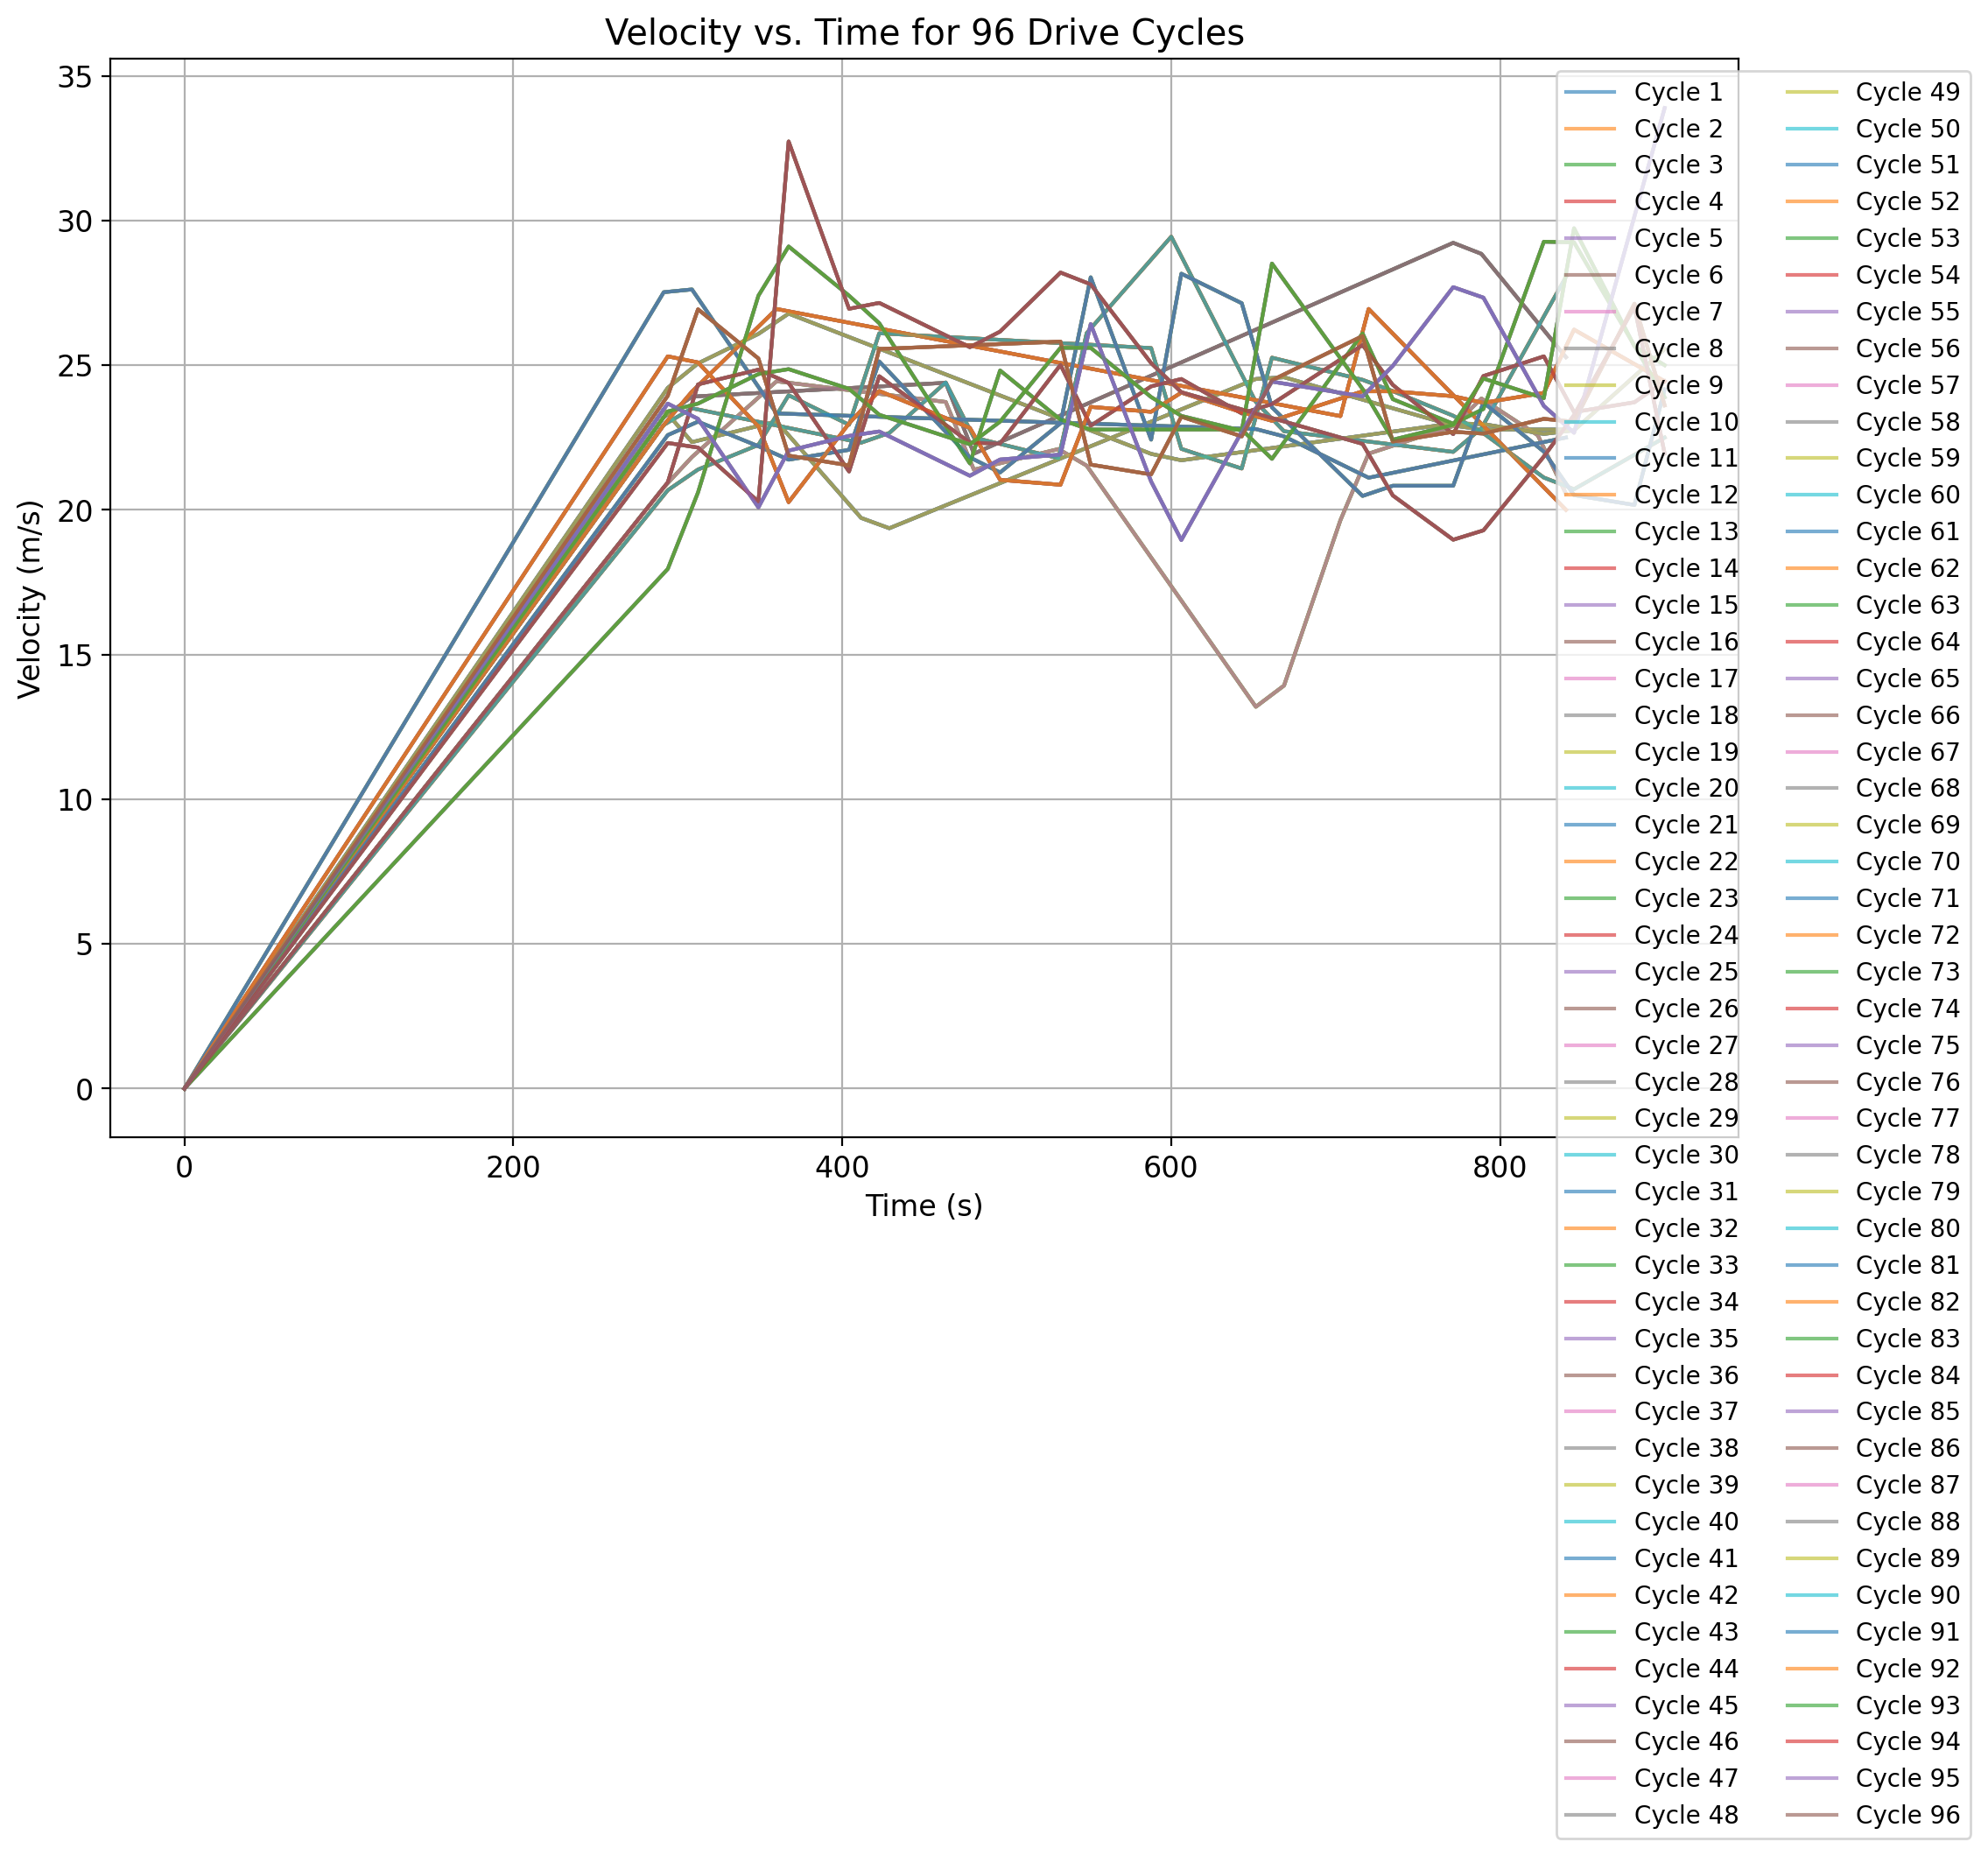

In [17]:
# Plot all drive cycles to visually check the variation of velocity
plt.figure(figsize=(12, 8))

for key in vel_dict:
    timeseries = vel_dict[key]
    plt.plot(timeseries["time"], timeseries["speed"], label=f"Cycle {key}", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs. Time for 96 Drive Cycles")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), ncol=2, fontsize='small')
plt.grid(True)
plt.show()

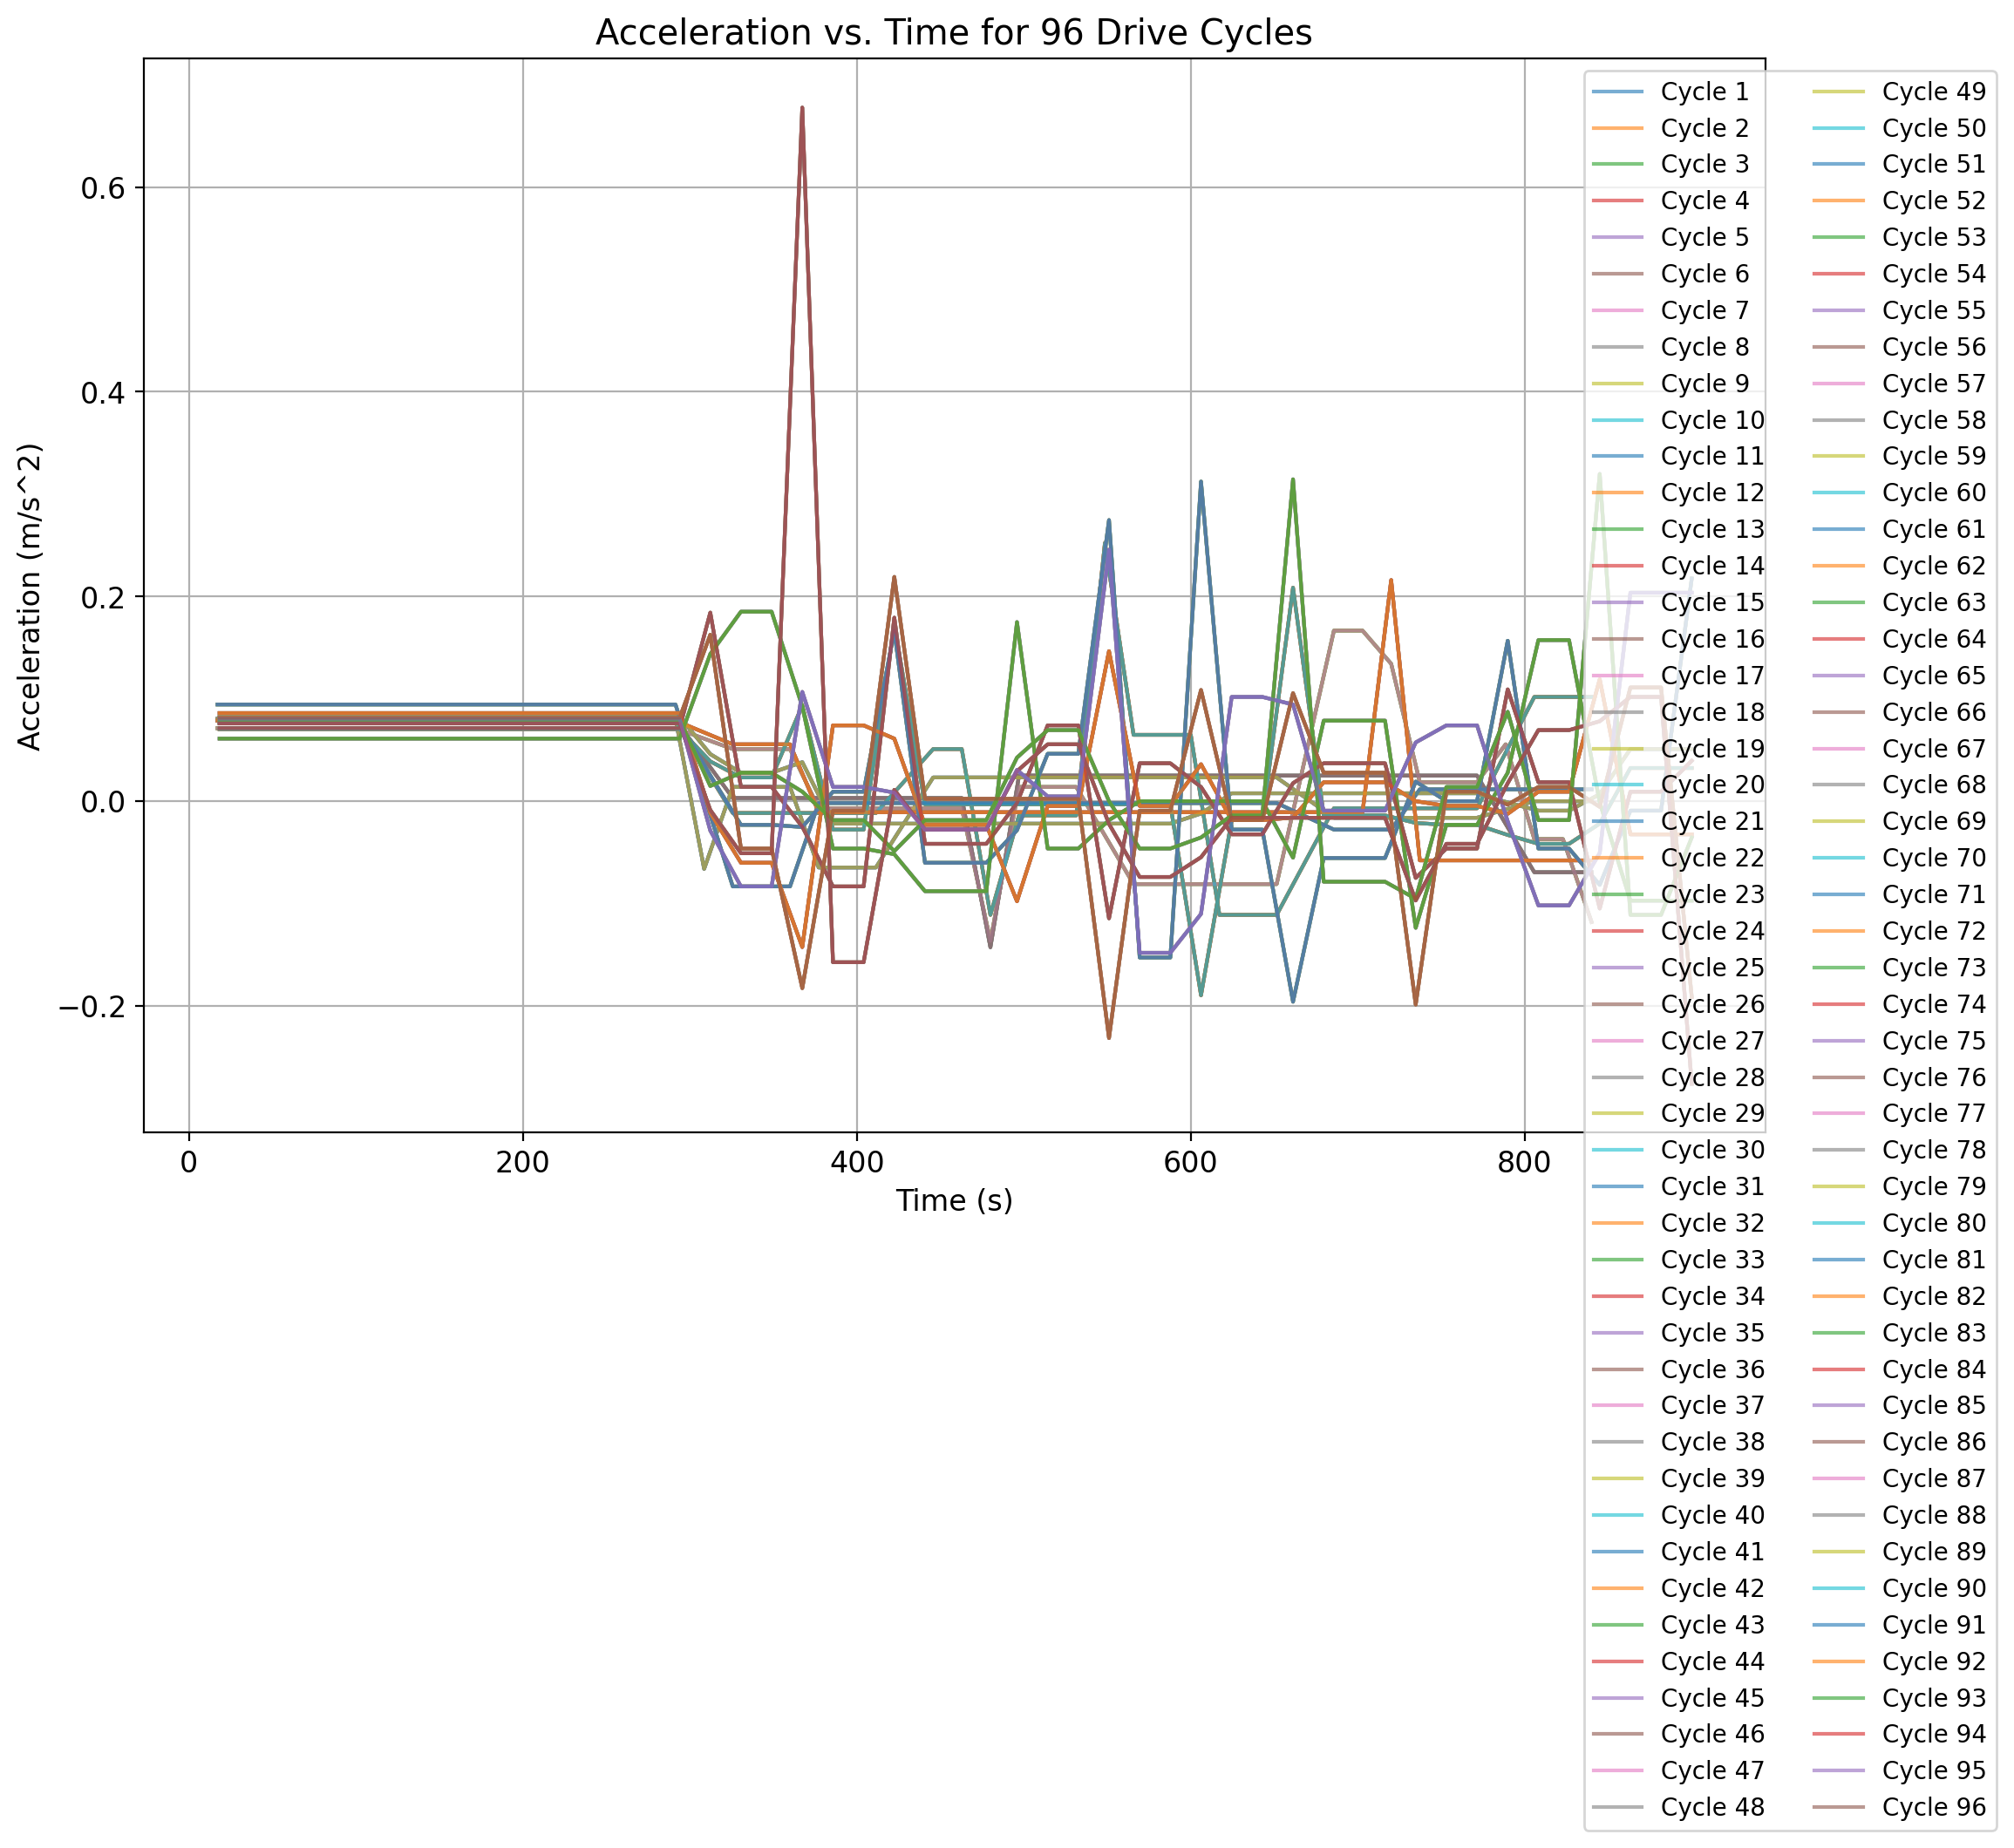

In [18]:
# Calculate acceleration and plot all drive cycles
plt.figure(figsize=(12, 8))

for key in vel_dict:
    timeseries = vel_dict[key]
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    plt.plot(timeseries["time"], timeseries["acceleration"], label=f"Cycle {key}", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Acceleration vs. Time for 96 Drive Cycles")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), ncol=2, fontsize='small')
plt.grid(True)
plt.show()

In [19]:
### Feature extraction from the input velocity files

def extract_max_speed(timeseries):
    max_speed = timeseries["speed"].max()
    return max_speed

def extract_mean_speed(timeseries):
    mean_speed = timeseries["speed"].mean()
    return mean_speed

# Higher variability in velocity means higher std(standard deviation) often suggests 
# more aggressive or incocnsistent driving patterns, which may lead to higher consumptions
def extract_std_speed(timeseries):
    std_speed = timeseries["speed"].std()
    return std_speed

# Calculate the total distance traveled using the trapezoidal rule for integration
def extract_total_distance(timeseries):
    total_distance = np.trapz(timeseries["speed"], timeseries["time"])
    return total_distance

# Calculate mean, max, min, and standard deviation of acceleration.
def extract_acceleration_metrics(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    mean_acceleration = timeseries['acceleration'].mean()
    max_acceleration = timeseries['acceleration'].max()
    min_acceleration = timeseries['acceleration'].min()
    std_acceleration = timeseries['acceleration'].std()
    return mean_acceleration, max_acceleration, min_acceleration, std_acceleration

# Calculate the total time spent accelerating.
def extract_time_spent_accelerating(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    time_spent_accelerating = (timeseries['acceleration'] > 0).sum() * timeseries['time'].diff().mean()
    return time_spent_accelerating
    
# Calculate the total time spent decelerating.
def extract_time_spent_decelerating(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    time_spent_decelerating = (timeseries['acceleration'] < 0).sum() * timeseries['time'].diff().mean()
    return time_spent_decelerating

# Extract the maximum deceleration from the timeseries.
def extract_max_deceleration(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    max_deceleration = timeseries['acceleration'].min()
    return max_deceleration

# Extract the mean deceleration from the timeseries.
def extract_mean_deceleration(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    mean_deceleration = timeseries[timeseries['acceleration'] < 0]['acceleration'].mean()
    return mean_deceleration
    
##Count the total number of stops (speed = 0).
# def extract_total_number_of_stops(timeseries):
#     Count the total number of stops (speed = 0).
#     total_number_of_stops = (timeseries["speed"] == 0).sum()
#     return total_number_of_stops

# def extract_duration_of_stops(timeseries):
#     """Calculate the total duration of stops."""
#     duration_of_stops = (timeseries["speed"] == 0).sum() * timeseries['time'].diff().mean()
#     return duration_of_stops


# Count the number of speed peaks in the timeseries.
def extract_number_of_speed_peaks(timeseries):
    number_of_speed_peaks = ((timeseries["speed"].diff().shift(-1) < 0) & (timeseries["speed"].diff() > 0)).sum()
    return number_of_speed_peaks

# Calculate the average speed during speed peaks.
def extract_average_speed_during_peaks(timeseries):
    peak_speeds = timeseries["speed"][(timeseries["speed"].diff().shift(-1) < 0) & (timeseries["speed"].diff() > 0)]
    average_speed_during_peaks = peak_speeds.mean()
    return average_speed_during_peaks

# Calculate the distance covered during speed peaks using the trapezoidal rule for integration.
def extract_distance_covered_during_peaks(timeseries):
    peak_times = timeseries["time"][(timeseries["speed"].diff().shift(-1) < 0) & (timeseries["speed"].diff() > 0)]
    distance_covered_during_peaks = np.trapz(peak_times)
    return distance_covered_during_peaks

# Extract the maximum drop in speed from the timeseries.
def extract_max_speed_drop(timeseries):
    max_speed_drop = timeseries["speed"].diff().min()
    return max_speed_drop

# Calculate the total duration of speed drops.
def extract_duration_of_speed_drops(timeseries):
    duration_of_speed_drops = (timeseries["speed"].diff() < 0).sum() * timeseries['time'].diff().mean()
    return duration_of_speed_drops

# Calculate the variance of the speed from the timeseries.
def extract_speed_variance(timeseries):
    speed_variance = timeseries["speed"].var()
    return speed_variance

# Count the number of accelerations in the timeseries.
def extract_number_of_accelerations(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    number_of_accelerations = (timeseries['acceleration'] > 0).sum()
    return number_of_accelerations

# Count the number of decelerations in the timeseries.
def extract_number_of_decelerations(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    number_of_decelerations = (timeseries['acceleration'] < 0).sum()
    return number_of_decelerations

def find_time(timeseries):
    time= timeseries['time'].iloc[-1]
    return time

In [20]:
# Function to featurize a single velocity timeseries
def featurize_velocity(timeseries):
    features = {}
    
    # Speed unit: m/s, and accelerations : m^2/s
    features['time (s)'] = find_time(timeseries)
    features['max_speed'] = extract_max_speed(timeseries)
    features['mean_speed'] = extract_mean_speed(timeseries)
    features['std_speed'] = extract_std_speed(timeseries)
    features['total_distance'] = extract_total_distance(timeseries)
    mean_accel, max_accel, min_accel, std_accel = extract_acceleration_metrics(timeseries)
    features['mean_acceleration'] = mean_accel
    features['max_acceleration'] = max_accel
    features['min_acceleration'] = min_accel
    features['std_acceleration'] = std_accel
    features['time_spent_accelerating'] = extract_time_spent_accelerating(timeseries)
    features['time_spent_decelerating'] = extract_time_spent_decelerating(timeseries)
    features['max_deceleration'] = extract_max_deceleration(timeseries)
    features['mean_deceleration'] = extract_mean_deceleration(timeseries)
    # features['total_number_of_stops'] = extract_total_number_of_stops(timeseries)
    # features['duration_of_stops'] = extract_duration_of_stops(timeseries)
    features['number_of_speed_peaks'] = extract_number_of_speed_peaks(timeseries)
    features['average_speed_during_peaks'] = extract_average_speed_during_peaks(timeseries)
    features['distance_covered_during_peaks'] = extract_distance_covered_during_peaks(timeseries)
    features['max_speed_drop'] = extract_max_speed_drop(timeseries)
    features['duration_of_speed_drops'] = extract_duration_of_speed_drops(timeseries)
    features['speed_variance'] = extract_speed_variance(timeseries)

    features['number_of_accelerations'] = extract_number_of_accelerations(timeseries)  # count
    features['number_of_decelerations'] = extract_number_of_decelerations(timeseries)  # count
    
    return features

In [ ]:
# Initialize an empty list to store feature dictionaries
all_features = []

# Loop through the dictionary of DataFrames and extract features for each one
for key in vel_dict:
    timeseries = vel_dict[key]
    features = featurize_velocity(timeseries)
    features['Mini_trip'] = key  # Add Mini_trip information
    all_features.append(features)

# Convert the list of feature dictionaries to a DataFrame
vel_info = pd.DataFrame(all_features)
vel_info['Total Velocity Drop(m/s)']= vel_drop_arr
vel_info['Total Velocity Drop time (s)']= vel_drop_time
vel_info['Velocity drop per unit time (m/s^2)']= vel_info['Total Velocity Drop(m/s)']/vel_info['Total Velocity Drop time (s)']
# Add 'SOC_drop (%)' from velocity_SOC.csv
vel_info['SOC_drop (%)'] = info_data_2['SOC_drop (%)']
# Rename columns with corrosponding unit in a formal format
vel_info.rename(columns={
    'max_speed': 'Max Speed (m/s)',
    'mean_speed': 'Mean Speed (m/s)',
    'std_speed': 'Speed Std Dev (m/s)',
    'total_distance': 'Total Distance (m)',
    'mean_acceleration': 'Mean Acceleration (m/s^2)',
    'max_acceleration': 'Max Acceleration (m/s^2)',
    'min_acceleration': 'Min Acceleration (m/s^2)',
    'std_acceleration': 'Acceleration Std Dev (m/s^2)',
    'time_spent_accelerating': 'Time Spent Accelerating (s)',
    'time_spent_decelerating': 'Time Spent Decelerating (s)',
    'max_deceleration': 'Max Deceleration (m/s^2)',
    'mean_deceleration': 'Mean Deceleration (m/s^2)',
    # 'total_number_of_stops': 'Total Number of Stops',
    # 'duration_of_stops': 'Duration of Stops (s)',
    'number_of_speed_peaks': 'Number of Speed Peaks',
    'average_speed_during_peaks': 'Average Speed During Peaks (m/s)',
    'distance_covered_during_peaks': 'Distance Covered During Peaks (m)',
    'max_speed_drop': 'Max Speed Drop (m/s)',
    'duration_of_speed_drops': 'Duration of Speed Drops (s)',
    'speed_variance': 'Speed Variance (m^2/s^2)',
    'number_of_accelerations': 'Number of Accelerations',
    'number_of_decelerations': 'Number of Decelerations'
}, inplace=True)

# Set the 'Mini_trip' as the index for convinence to track each features of each drive cycle
vel_info.set_index('Mini_trip', inplace=True)

# Display the DataFrame for visual checking
vel_info

In [22]:
vel_info.to_csv('velocity_data.csv', index= False)

In [23]:
## Machine Learning

In [24]:
## Regression ML models

def linear_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initializing and training the model
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = linear_model.predict(X_train_scaled)
    y_pred_test = linear_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_linear = mean_absolute_error(y_test, y_pred_test)
    mape_linear = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_linear)
    print('MAPE:', mape_linear)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Linear Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return linear_model, mape_linear

## KNN regression ML model
def knn_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_neighbors': range(1, 10),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
    }
    skf = KFold(n_splits=5, random_state=10, shuffle=True)

    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=skf, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    knn_model = grid_search.best_estimator_
    knn_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = knn_model.predict(X_train_scaled)
    y_pred_test = knn_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_knn = mean_absolute_error(y_test, y_pred_test)
    mape_knn = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_knn)
    print('MAPE:', mape_knn)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('KNN Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return knn_model, mape_knn

## Decision_tree regression ML model
def decision_tree_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    decision_tree_model = grid_search.best_estimator_
    decision_tree_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = decision_tree_model.predict(X_train_scaled)
    y_pred_test = decision_tree_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_dt = mean_absolute_error(y_test, y_pred_test)
    mape_dt = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_dt)
    print('MAPE:', mape_dt)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Decision Tree Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return decision_tree_model, mape_dt


## Decision_tree regression ML model
def random_forest_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [580, 600, 620],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }

    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    rf_model = grid_search.best_estimator_
    rf_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = rf_model.predict(X_train_scaled)
    y_pred_test = rf_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_rf = mean_absolute_error(y_test, y_pred_test)
    mape_rf = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_rf)
    print('MAPE:', mape_rf)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Random Forest Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return rf_model, mape_rf


## Gaussian_process regression ML model
def gaussian_process_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'alpha': [1e-5, 1e-2, 1],  # Regularization parameter
        'kernel': [Matern(length_scale=1.0, nu=1.5)], # Matern kernel with different nu values
        'normalize_y': [True, False]  # Whether to normalize the target values
    }

    # Initialize the Gaussian Process Regressor
    gpr = GaussianProcessRegressor(random_state=42)

    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(gpr, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    gp_model = grid_search.best_estimator_
    gp_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = gp_model.predict(X_train_scaled)
    y_pred_test = gp_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_gp = mean_absolute_error(y_test, y_pred_test)
    mape_gp = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_gp)
    print('MAPE:', mape_gp)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Gaussian Process Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return gp_model,  mape_gp

# Extremely Randomized Trees Regression
def extra_trees_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [400, 500, 600],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    extra_trees_model = grid_search.best_estimator_
    extra_trees_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_test = extra_trees_model.predict(X_test_scaled)
    
    # Evaluating the model
    mape_et = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('Extremely Randomized Trees Regression MAPE:', mape_et)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Extremely Randomized Trees Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return extra_trees_model, mape_et


## Nueral_network_regressor ML model 
def neural_network_regressor(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    
    # Initialize the MLPRegressor
    Nn_model = MLPRegressor(random_state=42, max_iter=500)
    
    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(Nn_model, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    Nn_model = grid_search.best_estimator_
    Nn_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = Nn_model.predict(X_train_scaled)
    y_pred_test = Nn_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_Nn = mean_absolute_error(y_test, y_pred_test)
    mape_Nn = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_Nn)
    print('MAPE:', mape_Nn)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Neural Network Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return Nn_model, mape_Nn

In [28]:
vel_info.columns

Index(['time (s)', 'max_speed', 'mean_speed', 'std_speed', 'total_distance',
       'mean_acceleration', 'max_acceleration', 'min_acceleration',
       'std_acceleration', 'time_spent_accelerating',
       'time_spent_decelerating', 'max_deceleration', 'mean_deceleration',
       'number_of_speed_peaks', 'average_speed_during_peaks',
       'distance_covered_during_peaks', 'max_speed_drop',
       'duration_of_speed_drops', 'speed_variance', 'number_of_accelerations',
       'number_of_decelerations', 'Mini_trip'],
      dtype='object')

In [30]:
vel_info['SOC_drop (%)'] = info_data_2['SOC_drop (%)']
df_selected = vel_info[[ 
                        # Selected features from the Pearson correlation
                        'mean_speed', 
                        'std_speed',
                        'std_acceleration', 
                        'number_of_speed_peaks', 
                        'distance_covered_during_peaks',
                        'speed_variance',
                        'average_speed_during_peaks',
                        'max_speed',
                        'total_distance',
    
                    
                        # Target variable
                        'SOC_drop (%)']]

In [32]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (5, 4)

MAE: 0.07441722260778741
MAPE: 0.03593886391602018


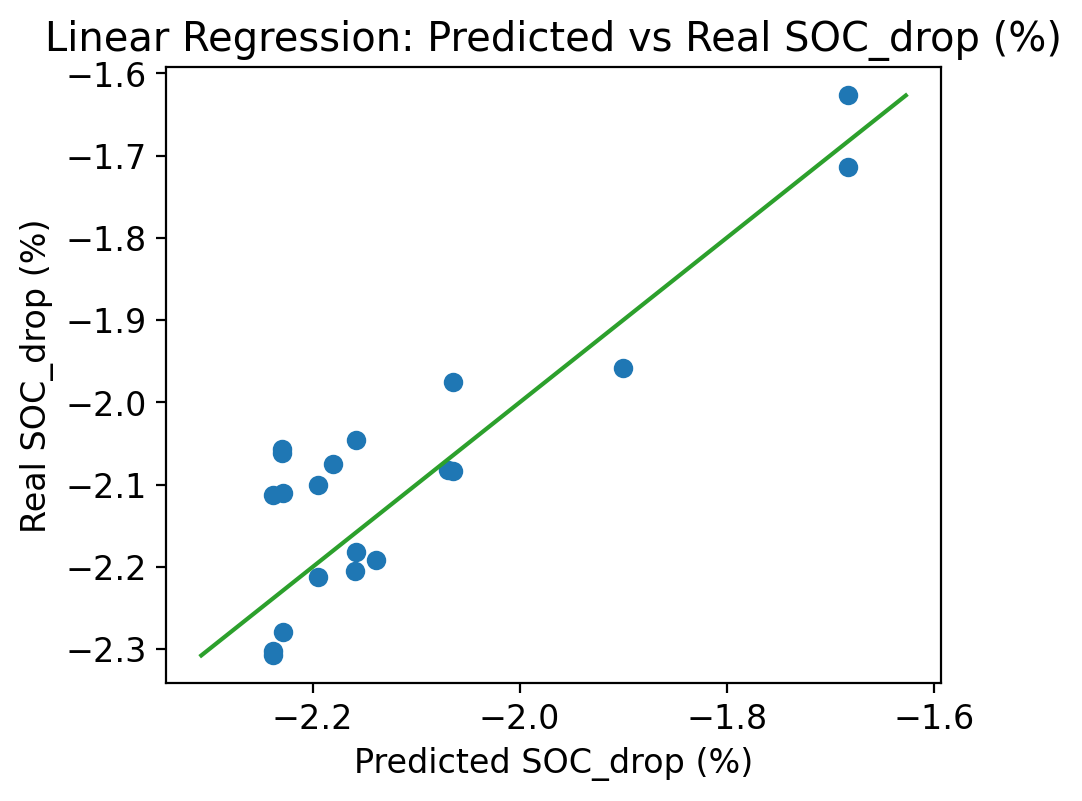

Best Parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
MAE: 0.07565607990107401
MAPE: 0.036562809909721085


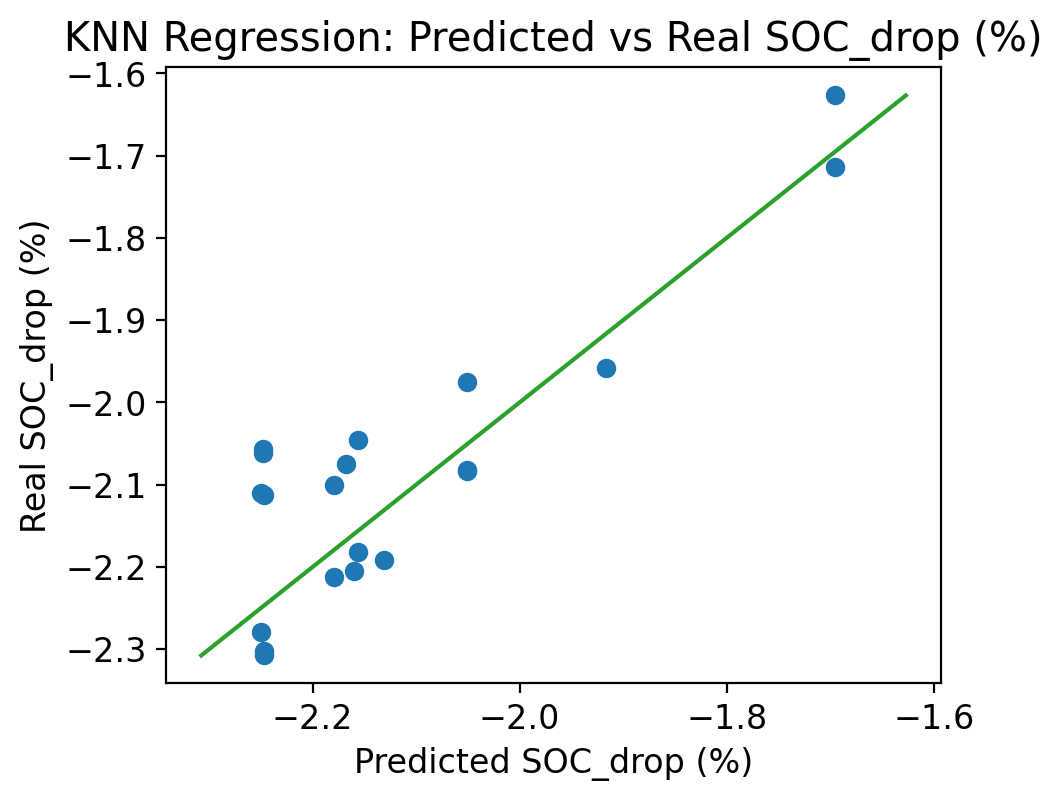

Best Parameters: {'max_depth': None, 'min_samples_split': 2}
MAE: 0.07715743343537063
MAPE: 0.03729647906235874


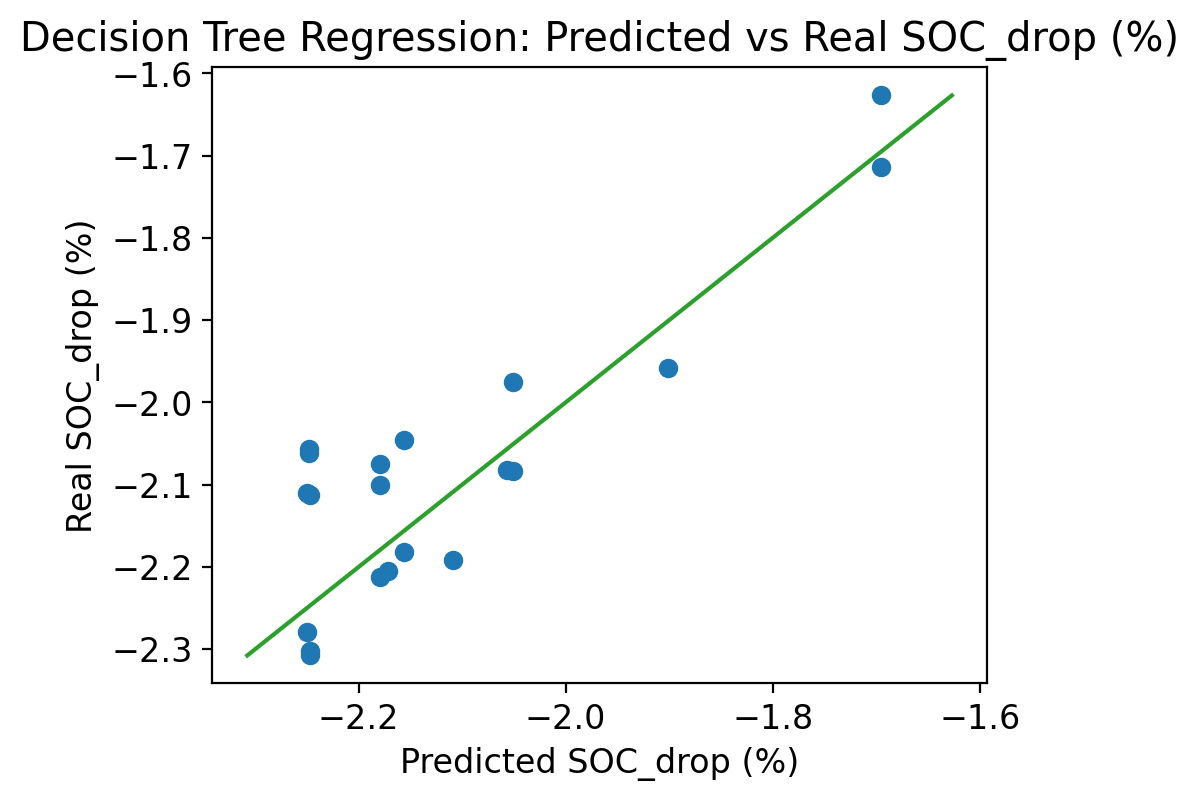

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 580}
MAE: 0.0767274420892425
MAPE: 0.037100143994897805


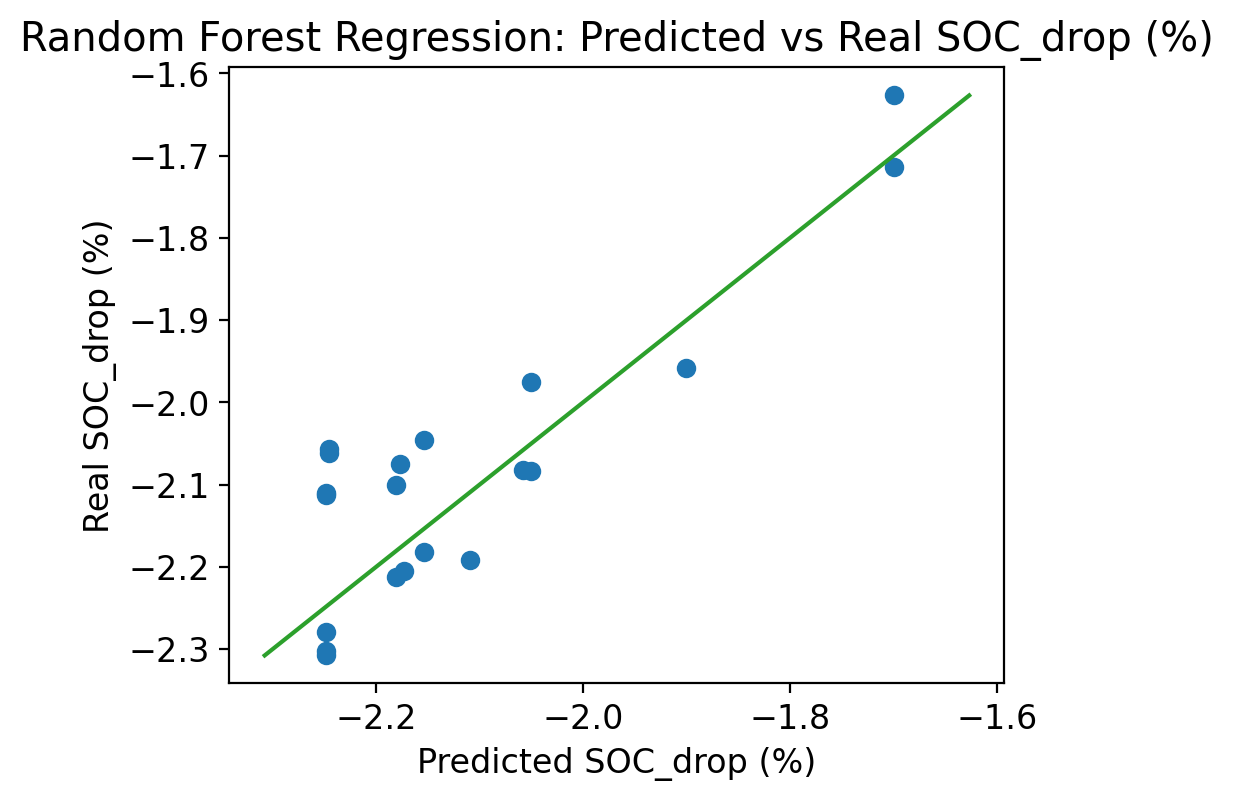

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better valu

Best Parameters: {'alpha': 0.01, 'kernel': Matern(length_scale=1, nu=1.5), 'normalize_y': False}
MAE: 0.07101968673427968
MAPE: 0.03419580918772409


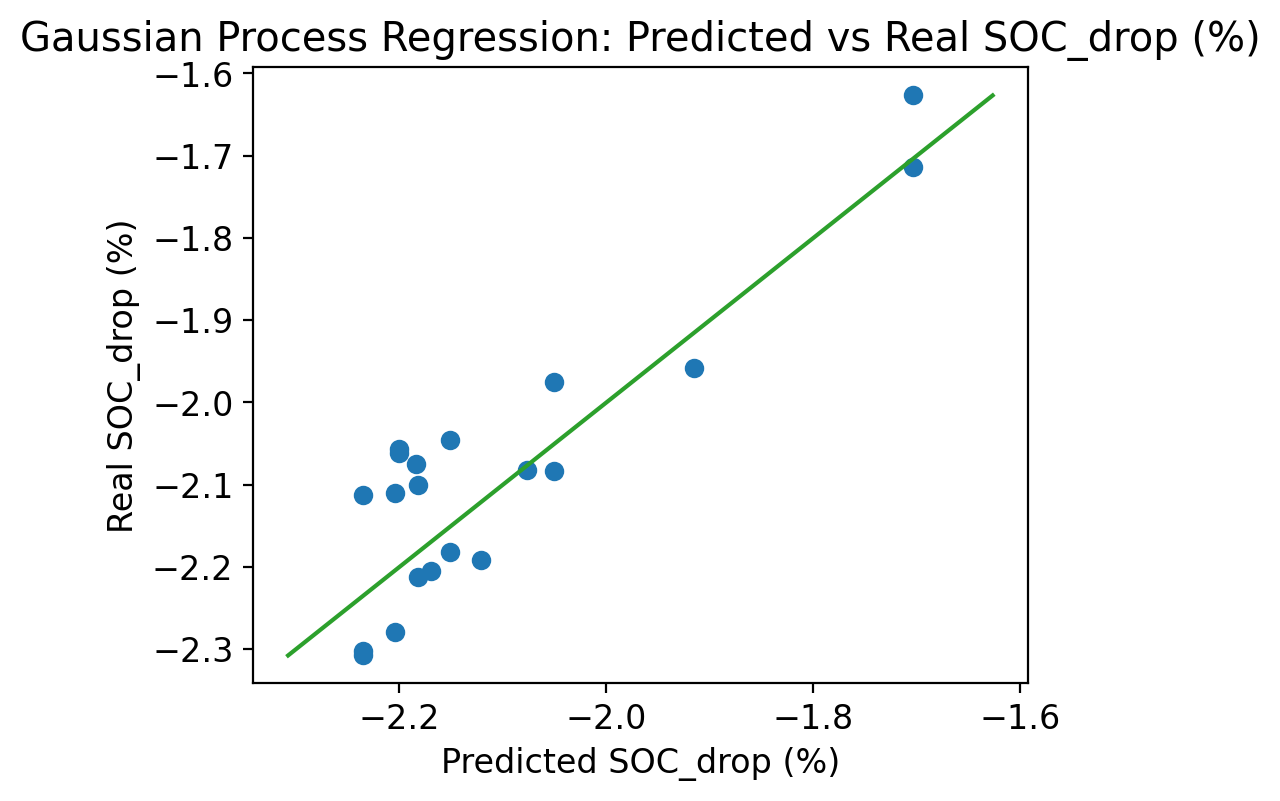

Extremely Randomized Trees Regression MAPE: 0.03729634814118274


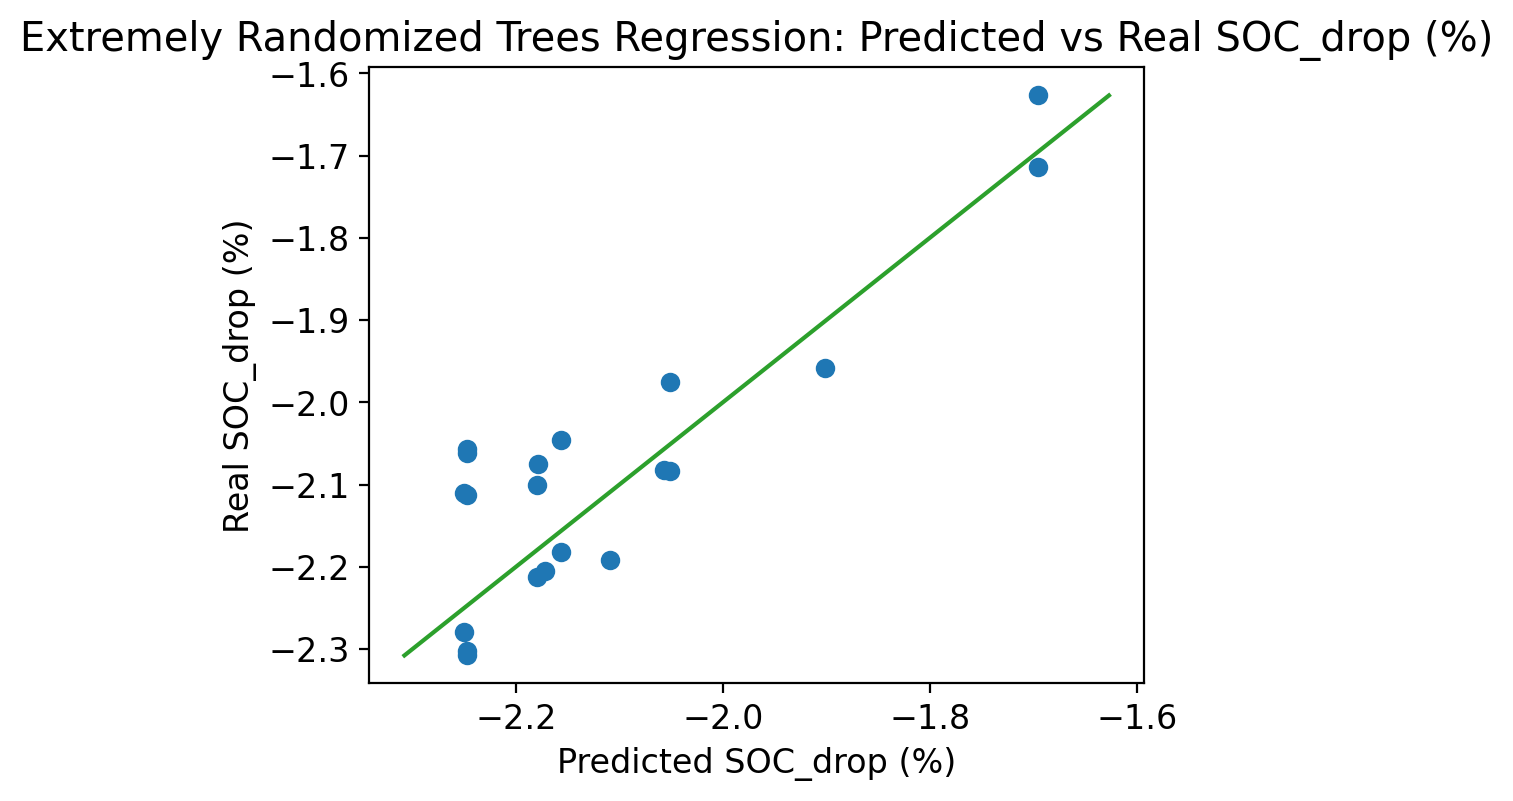

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
MAE: 0.07573165481123066
MAPE: 0.03666494697203738


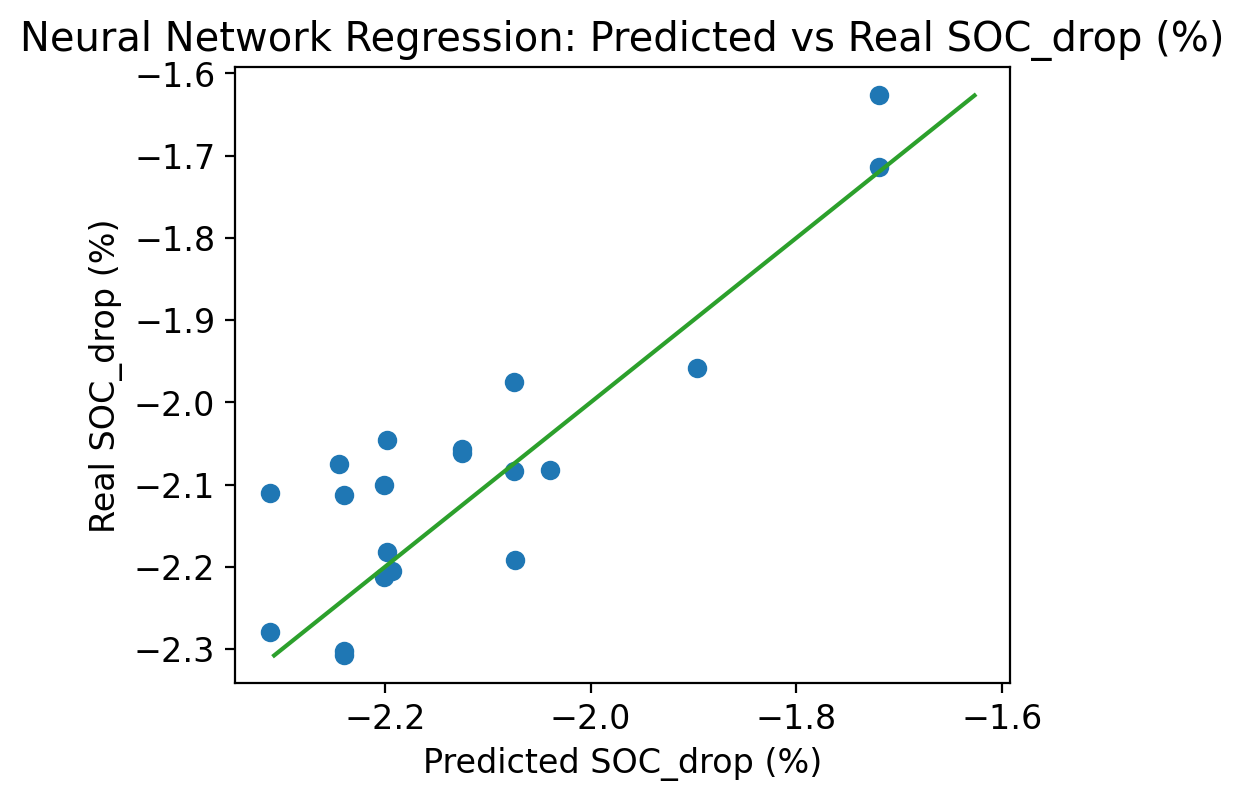

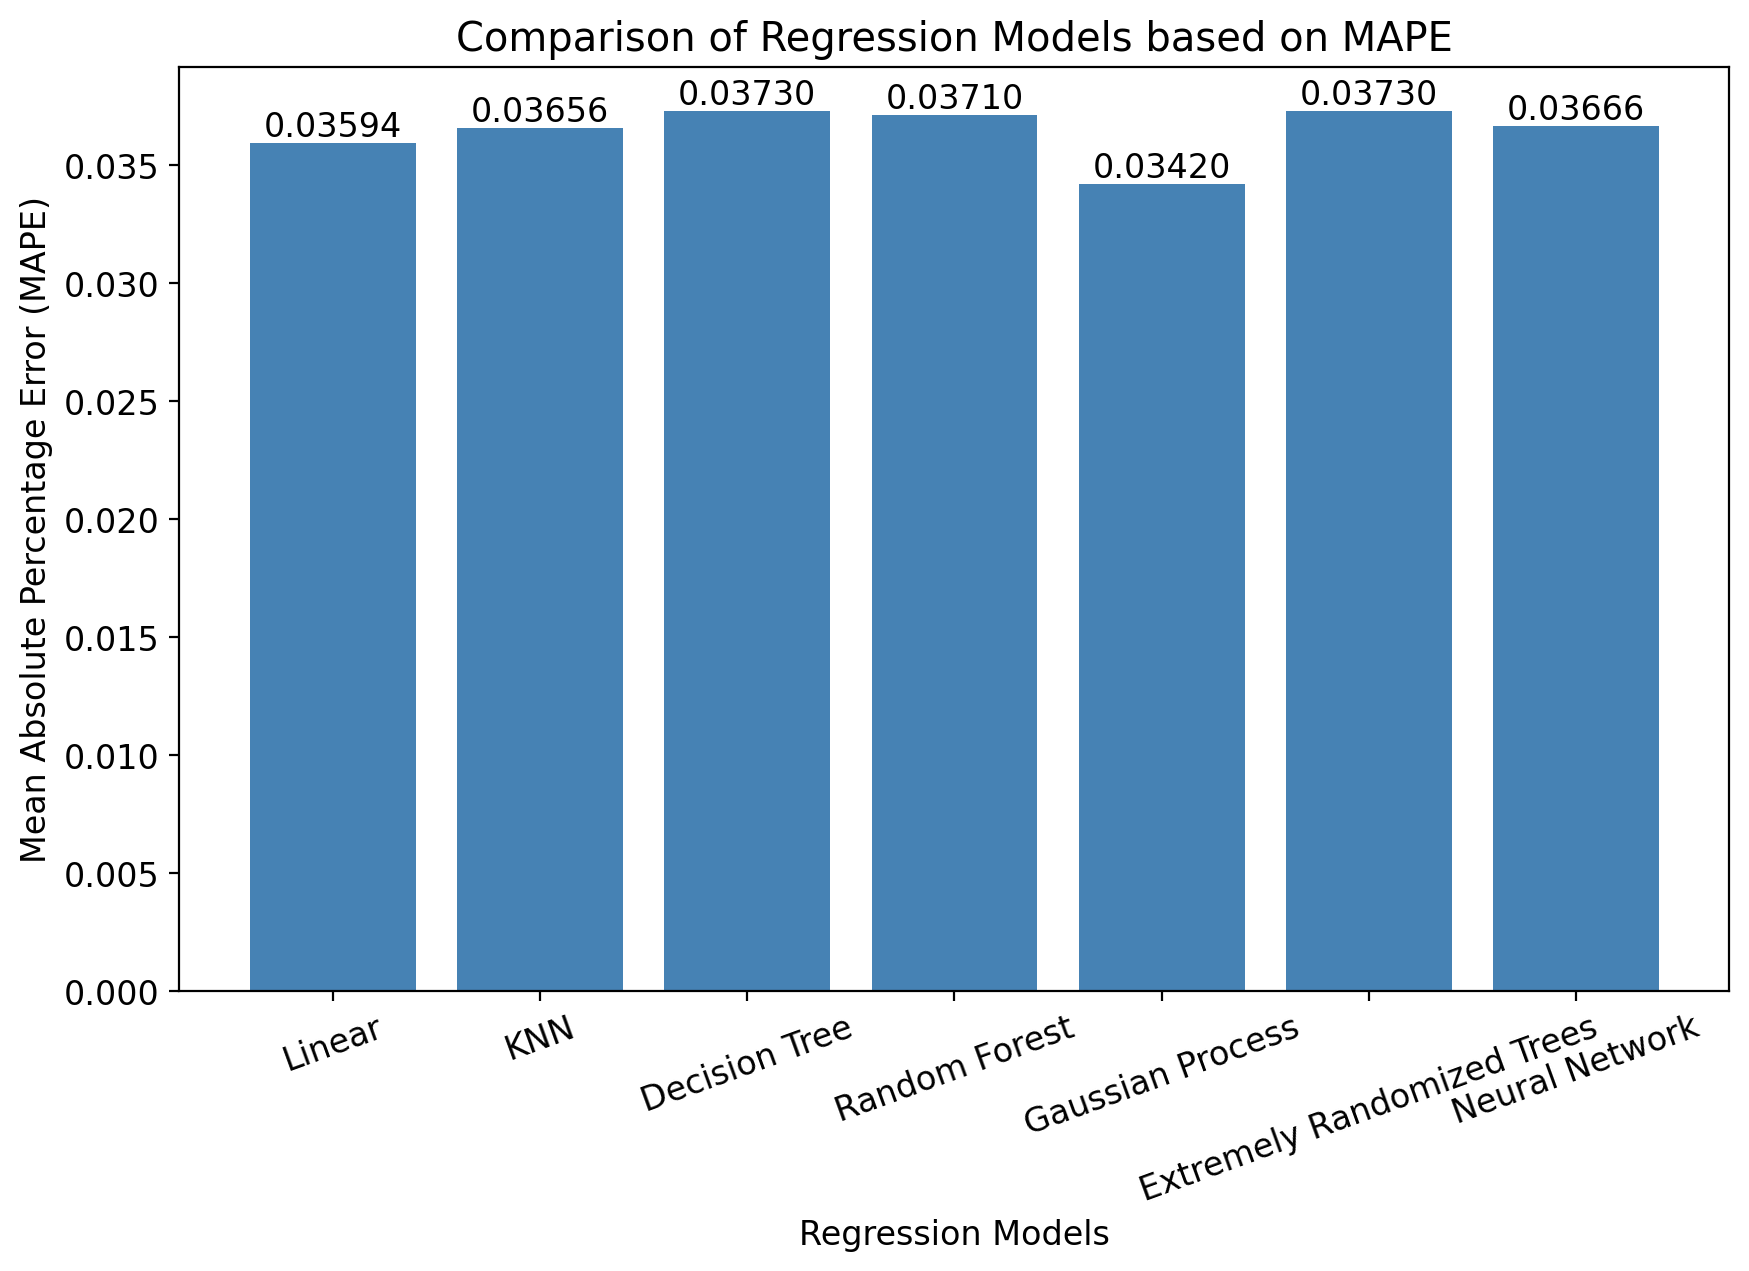

In [33]:
# Call the regression model functions with the selected features
linear_model, mape_linear = linear_regression(df_selected)
knn_model, mape_knn = knn_regression(df_selected)
dt_model, mape_dt = decision_tree_regression(df_selected)
rf_model, mape_rf = random_forest_regression(df_selected)
gp_model, mape_gp = gaussian_process_regression(df_selected)
extra_trees_model, mape_et = extra_trees_regression(df_selected)
Nn_model, mape_Nn = neural_network_regressor(df_selected)


# Plot the MAPE values in a bar chart for the comparation between ML models
models = ['Linear', 'KNN', 'Decision Tree', 'Random Forest', 'Gaussian Process', 'Extremely Randomized Trees','Neural Network']
mape_values = [mape_linear, mape_knn, mape_dt, mape_rf, mape_gp, mape_et, mape_Nn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, mape_values, color='steelblue')

# Add specific value of MAPE on top of each bar for better visualization
for bar, mape in zip(bars, mape_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{mape:.5f}', ha='center', va='bottom')

plt.xlabel('Regression Models')
# Rotate x-axis labels
plt.xticks(rotation=20)
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Regression Models based on MAPE')
plt.show()